# Mental Health in Tech Industry Draft7

# Introduction

Mental health is an important issue. Mental health affects every area of life and a person who is dealing with mental health issues is less productive in the workplace than one who does not. Dealing with mental health disorders can impact productivity levels. A mentally healthy person is more likely to work more efficiently and provide higher-quality work. This is why mental health is an important issue.

There tends to be a stigma attached to issues related to mental health. This stigma surrounding issues of mental health can cause some people to be more careful in how and with whom they speak about their mental health. This is significantly different than how we consider our physical health issues. The stigma surrounding mental health seems to be less when discussing physical health.

According to the World Health Organization, Mental health is described as a state of well-being where a person can cope with the normal stresses of life. This state permits productive work output and allows for meaningful contributions to society. In the United States, the Centers for Disease Control and Prevention (CDC) estimates that 1 in 5 adults experience at least one mental health condition every year.

In this report, I will analyze the findings of 5 surveys of tech industry workers related to mental health. The surveys were taken in 2014, 2016, 2017, 2018, and 2019. In total, 4218 people from 79 countries participated in the surveys. The surveys have a real bias since the majority of participants were males from the United States. Therefore, we have to make conclusions about mental health issues with tech workers carefully. The findings of this report also include current or past history of mental illness, in addition to family history of mental illness in tech industry workers based on answers to specific questions. 

I used 3 databases for this analysis:

> **Survey:** Contains the year each survey was conducted. The year serves as the SurveyID. <br>
> **Question:** Contains 105 questions. Not all questions were used in all the years. Not all questions were given to every individual surveyed. Each question has a unique QuestionID.<br>
> **Answer:** Contains 236,898 answers. Participants generally answered more than one question. The answers are in a column called AnswerText.

For this report, I concentrated on tech industry workers who work for tech companies. I did not choose participants who answered No to the question that asked if their primary role in the company is a tech/IT related (QuestionID 9). I did not choose participants who answered No to the question that asked if the employer is primarily a tech company/organization (QuestionID 13). The total number of participants in my analysis is 909.

# Goal

The goal of this analysis is to provide some clarity about mental health issues encountered by tech workers in tech companies.

# Technical Requirements

1. Download the data.
2. Load data using SQLite and Pandas.
3. Perform exploratory data analysis.
4. Provide clear explanations. 
5. Provide suggestions about how the analysis can be improved.

# Libraries

In [431]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display

# Display Parameters

## Display Features

In [432]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [433]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"
male_color = "royalblue"
female_color = "pink"
graph_color1 = "indianred"
graph_color2 = "slategrey"

## Figure Parameters

In [434]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load and Display Raw Data

In [435]:
db_survey = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

# Datasets

## Survey Dataset

In [436]:
df_surveys = pd.read_sql_query("SELECT * FROM Survey", db_survey)

In [437]:
df_surveys

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [438]:
df_surveys.SurveyID.count()

5

## Question Dataset

In [439]:
df_questions = pd.read_sql_query("SELECT * FROM Question", db_survey)
df_questions.count().to_frame()
df_questions = df_questions.rename(
    columns={"questiontext": "QuestionText", "questionid": "QuestionID"}
)
df_questions.style.set_properties(**{'text-align': 'left'})

,QuestionText,QuestionID
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [440]:
df_questions.QuestionID.count()

105

## Answer Dataset

In [441]:
df_answers = pd.read_sql_query("SELECT * FROM Answer", db_survey)

In [442]:
df_answers.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


df_answers.QuestionID.count()

### Section Summary
> * The Survey dataset contains the year of each survey identified by SurveyID. 
> * The question dataset contains 105 questions. Each question is identified by a unique QuestionID. The first question is QuestionID 1. The last question is QuestionID 118. 
> * The following QuestionIDs are missing: 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47.
> * The same set of questions was not given to all participants.
> * The answers dataset contains 236,898 answers. Each participant answered multiple questions.  
> * In the answers dataset, 1 means YES. 0 means NO and -1 indicates the participant did not provide an answer.
> * Some of the answers were given as a scale. Participants answered by providing a number from 1 - 10. 10 being the highest or strongest response. 
> * Some of the answers were a narrative describing an issue or situation.

# Tech Workers in Tech Companies

In [443]:
df_totals = pd.read_sql_query(
    "SELECT DISTINCT UserID FROM Answer",
    db_survey
)

df_totals.UserID.count()

4218

## QuestionID: 9
Is your employer primarily a tech company/organization?

In [444]:
df_Answer9 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 9 AND AnswerText = '1'",
    db_survey
)

## QuestionID: 31
Is your primary role within your company related to tech/IT?

In [445]:
df_Answer13 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 13 AND AnswerText = '1'",
    db_survey
)

In [446]:
df_TechinTech = pd.merge(df_Answer13, df_Answer9 , on='UserID', how='inner')

In [447]:
Total_TechinTech = df_TechinTech.UserID.count()
Total_TechinTech

909

### Section Summary
> * In total, 4218 people participated in the surveys. 
> * I wanted this report to be specifically about tech workers in the tech industry. Therefore, I eliminated certain participants.
> * I eliminated participants who answered No to QuestionID 9: "Is your employer primarily a tech company/organization?" 
> * I eliminated participants who answered No to QuestionID 13: "Is your primary role within your company related to tech/IT?" 
> * I analyzed the responses of the remaining 909 participants. These are workers whose jobs are tech/IT related and who worked primarily for a tech company or organization.

# Countries of Residence

In [448]:
df_Answer3 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 3",
    db_survey
)

In [449]:
df_Country = pd.merge(df_TechinTech, df_Answer3 , on='UserID', how='inner')

In [450]:
df_Country = df_Country.drop(['UserID', 'SurveyID', 'QuestionID'], axis = 1)

In [451]:
df_Country_count = df_Country.AnswerText.value_counts()

In [452]:
df_Country_count = pd.DataFrame(df_Country_count)

In [453]:
df_Country_count = df_Country_count.reset_index()

In [454]:
df_Country_count = df_Country_count.rename(
    columns={"index": "Country", "AnswerText": "Count"}
)

In [455]:
df_Country_count["Country"] = df_Country_count["Country"].replace(
    {
        "-1": "Other",
        "Bahamas, The": "Bahamas",
        "United States of America": 'United States'
    }
)

In [456]:
Total_OtherCountries = df_Country_count[8:][['Count']].sum()
Total_OtherCountries = Total_OtherCountries.Count

In [457]:
df_Country_count = df_Country_count[df_Country_count.Count >= 14]

In [458]:
df_Country_count.loc[13] = ['Other', Total_OtherCountries] 
df_Country_count

,Country,Count
0,United States,624
1,United Kingdom,61
2,Canada,21
3,India,21
4,Portugal,18
5,Germany,18
6,France,16
7,Spain,15
8,Netherlands,14
13,Other,115


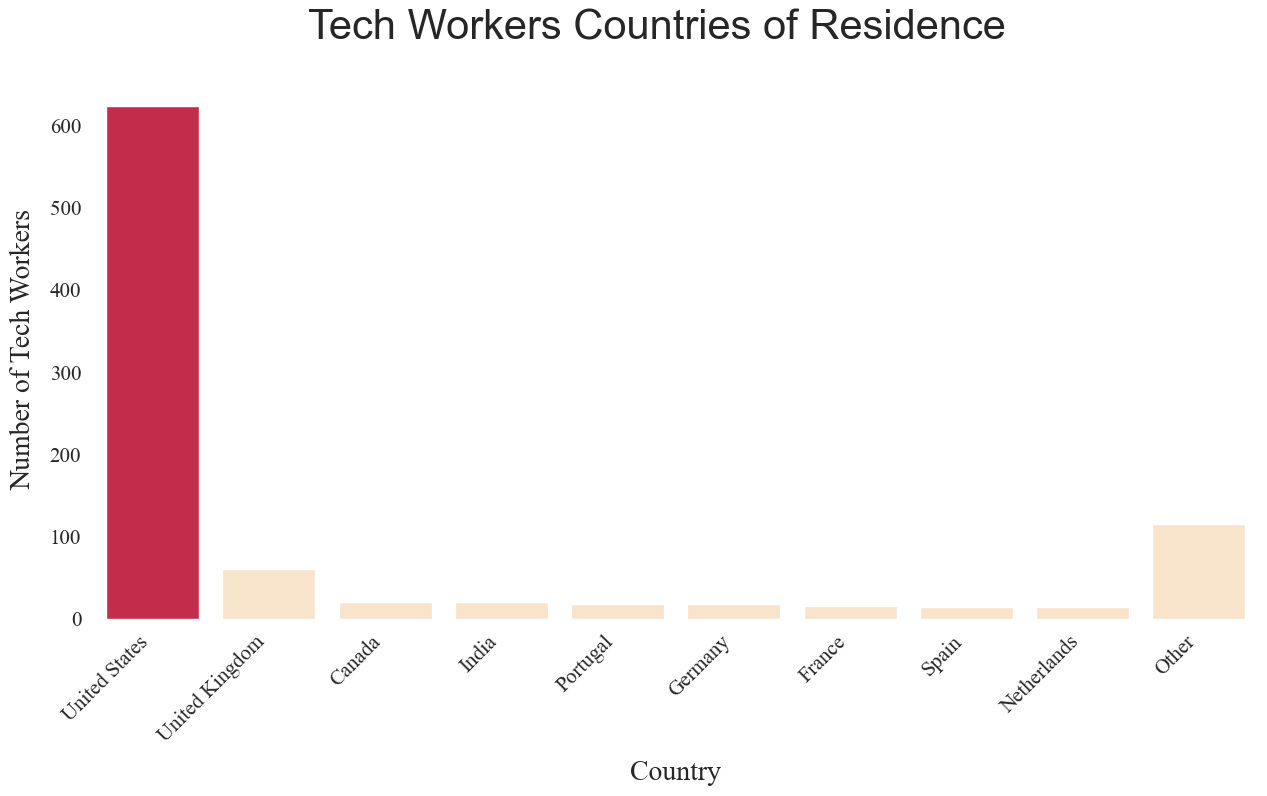

In [459]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Country",
    y="Count",
    data=df_Country_count,
    errorbar=None,
    palette=[ord_color if x != "United States" else spec_lev1
        for x in df_Country_count["Country"]],
)


plt.xlabel("Country")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Tech Workers Countries of Residence")

plt.show()

### Section Summary
> * The majority (624 of 909) of participants for this analysis lived in the United States. I consider this as one of the flaws of these surveys. We have to keep this fact in mind when forming conclusions based on the results of this analysis.

# Gender

In [460]:
df_Answer2 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 2", db_survey)

In [461]:
df_Gender = pd.merge(df_TechinTech, df_Answer2 , on='UserID', how='inner')

In [462]:
df_Gender_count = df_Gender.AnswerText.value_counts()
df_Gender_count = pd.DataFrame(df_Gender_count)
df_Gender_count = df_Gender_count.reset_index()

In [463]:
df_Gender_count = df_Gender_count.rename(
    columns={"index": "Gender", "AnswerText": "Count"}
)

In [464]:
df_Gender_count["Gender"] = df_Gender_count["Gender"].replace(
    {"female": "Female", "male": "Male", "MALE": "Male"}
)

In [465]:
df_Gender_count["Gender"] = np.where(
    (df_Gender_count["Gender"] == "Male") | (df_Gender_count["Gender"] == "Female"),
    df_Gender_count["Gender"],
    "Other",
)

In [466]:
df_Gender_count = df_Gender_count.groupby("Gender").sum()
df_Gender_count = df_Gender_count.reset_index()
df_Gender_count = df_Gender_count.sort_values('Count', ascending = False)
df_Gender_count

,Gender,Count
1,Male,605
0,Female,255
2,Other,49


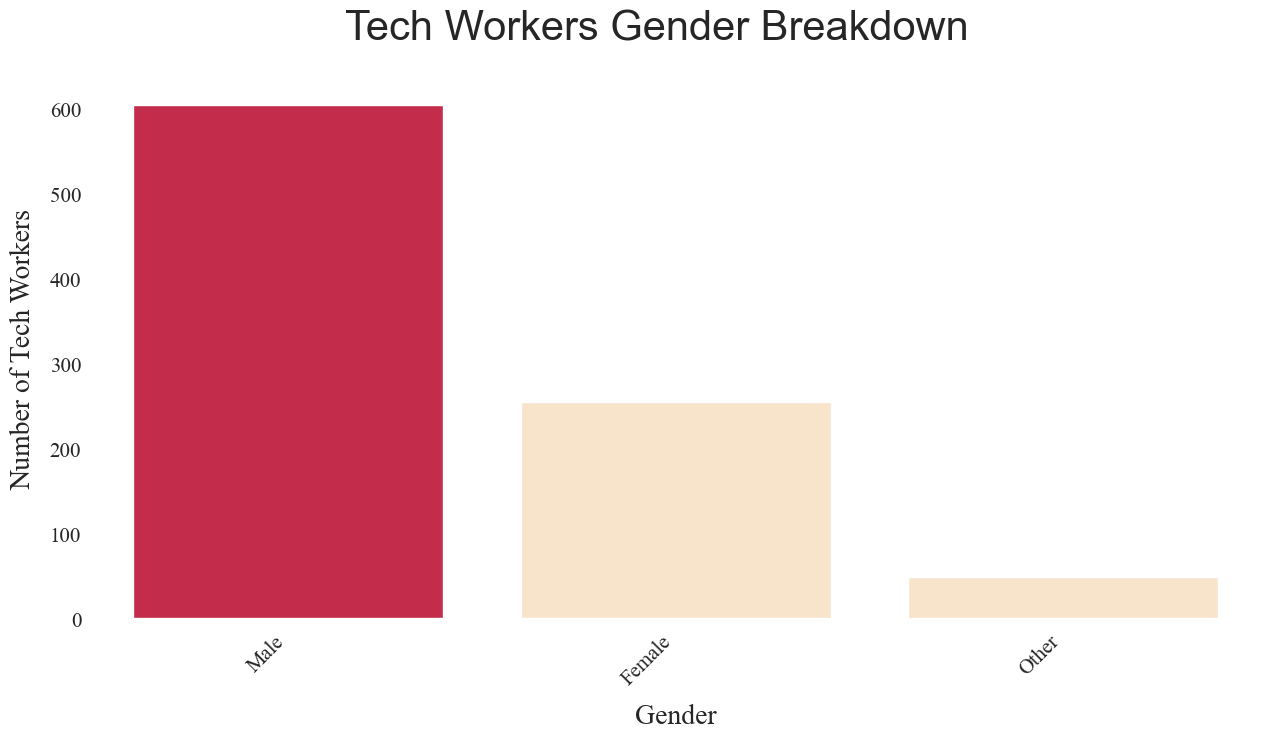

In [467]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Gender",
    y="Count",
    data=df_Gender_count,
    order=(df_Gender_count.sort_values('Count', ascending = False).Gender),
    errorbar=None,
    palette=[ord_color if x != "Male" else spec_lev1
        for x in df_Gender_count["Gender"]],
)


plt.xlabel("Gender")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Tech Workers Gender Breakdown")

plt.show()

### Section Summary
> * 605 of the 909 participants in this analysis identified themselves as male. I consider this as one of the flaws in the surveys. We have to keep this fact in mind when forming conclusions based on the results of this analysis.
> * 255 participants identified themselves as female
> * 49 identified themselves in many other ways, such as "I have a penis," or "male 9:1 female, roughly." I saw no good way to deal with such answers, so I placed those participants in one group that I called "Other." 

# Age

In [468]:
df_Answer1 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 1", db_survey
)

In [469]:
df_Answer1 = pd.merge(df_TechinTech, df_Answer1 , on='UserID', how='inner')

In [470]:
df_Answer1["AnswerText"] = df_Answer1["AnswerText"].astype(int)

In [471]:
df_Answer1.sort_values("AnswerText", inplace=True)

In [472]:
df_Answer1 = df_Answer1[df_Answer1.AnswerText >= 20]

In [473]:
df_Age_count = df_Answer1.AnswerText.value_counts()
df_Age_count = pd.DataFrame(df_Age_count)
df_Age_count = df_Age_count.reset_index()

In [474]:
df_Age_count = df_Age_count.rename(columns={"index": "Age", "AnswerText": "Count"})

In [475]:
df_Age_count.loc[df_Age_count['Age'].between(20, 29, 'both'), 'Range'] = '20s'
df_Age_count.loc[df_Age_count['Age'].between(30, 39, 'both'), 'Range'] = '30s'
df_Age_count.loc[df_Age_count['Age'].between(40, 49, 'both'), 'Range'] = '40s'
df_Age_count.loc[df_Age_count['Age'].between(50, 59, 'both'), 'Range'] = '50s'
df_Age_count.loc[df_Age_count['Age'].between(60, 69, 'both'), 'Range'] = '60s'
df_Age_count.loc[df_Age_count['Age'].between(70, 79, 'both'), 'Range'] = '70s'

In [476]:
df_Age_count_grouped = df_Age_count.groupby('Range')['Count'].sum()
df_Age_count_grouped = df_Age_count_grouped.to_frame()
df_Age_count_grouped = df_Age_count_grouped.reset_index()
df_Age_count_grouped 

,Range,Count
0,20s,262
1,30s,418
2,40s,192
3,50s,28
4,60s,5


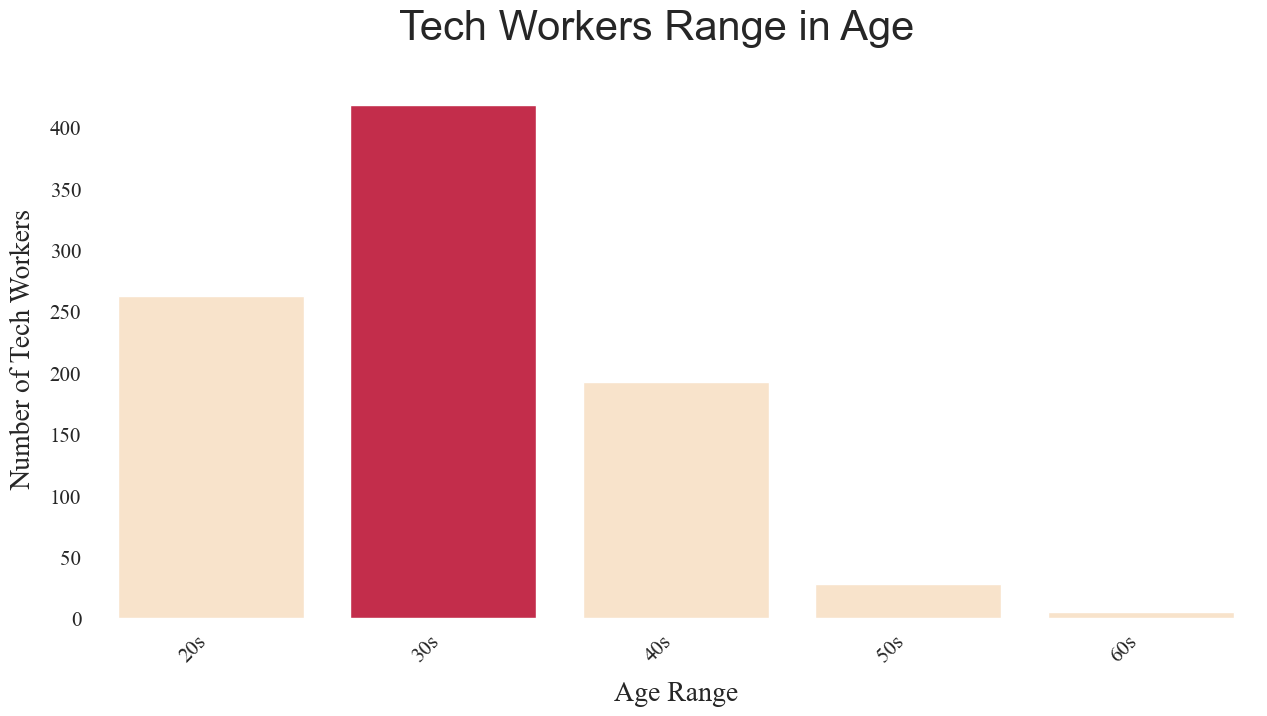

In [477]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Range",
    y="Count",
    data=df_Age_count_grouped,
    errorbar=None,
    palette=[ord_color if x != "30s" else spec_lev1
        for x in df_Age_count_grouped["Range"]],
)


plt.xlabel("Age Range")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Tech Workers Range in Age")

plt.show()

### Section Summary
> * I divided the participants into 6 groups: 20s, 30s, 40s, 50s, 60s, and 70s. 
> * For this question, there were unbelievable answers such as, "-29," and "329." I eliminated the participants who gave such answers for this part of the report. 
> * Few of the participants reported their age below 20. I eliminated participants with those answers for this part of the report to keep the 6 groups with the most number of participants. 
> * The largest group was in their 30s, followed by those in their 20s and those in their 40s.

# Mental Disorders in Tech Industry Workers

## Family History of Mental Illness

In [478]:
df_Answer6 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 6 AND AnswerText = 'Yes'",
    db_survey
)

In [479]:
df_FamilyDisorder = pd.merge(df_TechinTech, df_Answer6 , on='UserID', how='inner')

In [480]:
Total_FamilyDisorder = df_FamilyDisorder.count()

In [481]:
Total_NoFamilyDisorder = Total_TechinTech - Total_FamilyDisorder 

## Past Diagnosis of Mental Health Disorder

In [482]:
df_Answer34 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 34 AND AnswerText = 'Yes'",
    db_survey
)

In [483]:
df_PastDisorder = pd.merge(df_TechinTech, df_Answer34 , on='UserID', how='inner')

In [484]:
Total_PastDisorder = df_PastDisorder.count()
Total_PastDisorder.UserID

371

In [485]:
Total_NoPastDisorder = Total_TechinTech - Total_PastDisorder 

## Current Mental Health Disorder

In [486]:
df_Answer33 = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 33 AND AnswerText = 'Yes'",
    db_survey
)

In [487]:
df_CurrentDisorder = pd.merge(df_TechinTech, df_Answer33 , on='UserID', how='inner')

In [488]:
Total_CurrentDisorder = df_CurrentDisorder.count()

In [489]:
Total_NoCurrentDisorder = Total_TechinTech - Total_CurrentDisorder 

# Current, Past or Family History of Mental Disorder

In [490]:
df_AllThree = pd.merge(pd.merge(df_FamilyDisorder,df_PastDisorder,on='UserID'),df_CurrentDisorder,on='UserID')

In [491]:
Total_AllThree = df_AllThree.count()

In [492]:
Total_NotAllThree = Total_TechinTech - Total_AllThree

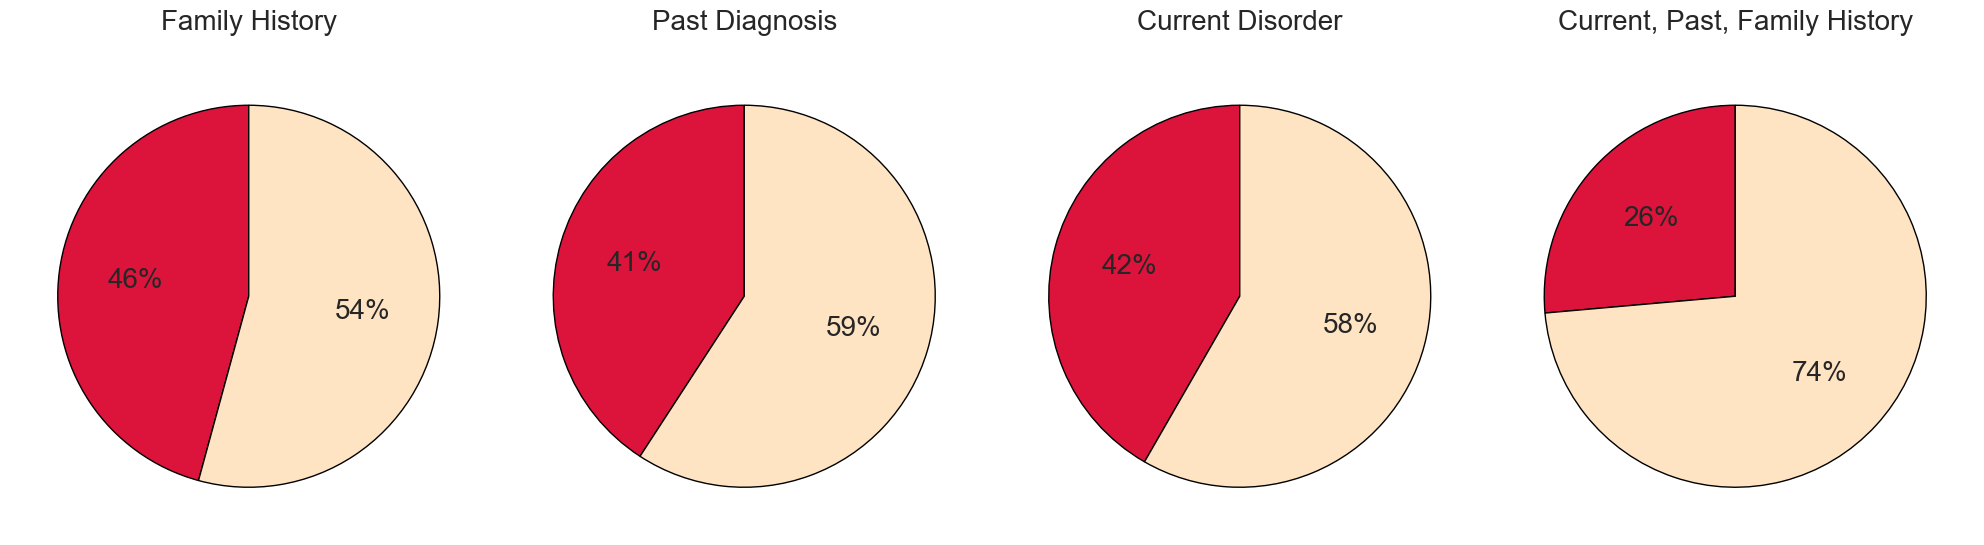

In [493]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 7))

data_FamilyDisorder = [Total_FamilyDisorder.UserID, Total_NoFamilyDisorder.UserID]
data_PastDisorder = [Total_PastDisorder.UserID, Total_NoPastDisorder.UserID]
data_CurrentDisorder = [Total_CurrentDisorder.UserID, Total_NoCurrentDisorder.UserID]
data_AllThree = [Total_AllThree.UserID, Total_NotAllThree.UserID]

ax1.pie(
    data_FamilyDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
    
)

ax2.pie(
    data_PastDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
   
)

ax3.pie(
    data_CurrentDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},

)

ax4.pie(
    data_AllThree,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
    
)

ax1.set_title('Family History', fontsize=20)
ax2.set_title('Past Diagnosis', fontsize=20)
ax3.set_title('Current Disorder', fontsize=20)
ax4.set_title('Current, Past, Family History', fontsize=20)

plt.tight_layout()

plt.show()

### Section Summary
> * Between 46% of participants reported past of a family history of mental illness. 
> * Between 41% reported a past diagnosis of mental illness. 
> * Between 42% reported having a current mental health disorder.
> * 26% of participants reported having a current mental disorder, a past diagnosis and a family history of mental illness. 

# Attitude Toward Mental Health in the Tech Industry

## Question ID: 11 
Is your anonimity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

In [494]:
df_Answer11 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 11", db_survey)
Total_Answer11 = df_Answer11.UserID.count()

In [495]:
df_Answer11_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 11 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer11 = df_Answer11_Yes.UserID.count()

In [496]:
df_Answer11TechinTech = pd.merge(
    df_TechinTech, df_Answer11_Yes, on="UserID", how="inner"
)

In [497]:
TechinTech_Answer11 = df_Answer11TechinTech.UserID.count()

## Question ID: 17 
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

In [498]:
df_Answer17 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 17", db_survey)
Total_Answer17 = df_Answer17.UserID.count()

In [499]:
df_Answer17_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 17 AND (AnswerText = 'Very easy' OR AnswerText = 'Somewhat easy')",
    db_survey,
)
Yes_Answer17 = df_Answer17_Yes.UserID.count()

In [500]:
df_Answer17TechinTech = pd.merge(
    df_TechinTech, df_Answer17_Yes, on="UserID", how="inner"
)

In [501]:
TechinTech_Answer17 = df_Answer17TechinTech.UserID.count()

## Question ID: 83 
Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?

In [502]:
df_Answer83 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 83", db_survey)
Total_Answer83 = df_Answer83.UserID.count()

In [503]:
df_Answer83_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 83 AND (AnswerText = 'Yes, I experienced' OR AnswerText = 'Yes, I observed')",
    db_survey,
)
Yes_Answer83 = df_Answer83_Yes.UserID.count()

In [504]:
df_Answer83TechinTech = pd.merge(df_TechinTech, df_Answer83_Yes, on="UserID", how="inner")

In [505]:
TechinTech_Answer83 = df_Answer83TechinTech.UserID.count()

##  Score: Positive Attitude Toward Mental Illness

In [506]:
df_attitude = pd.merge(
    pd.merge(df_Answer11TechinTech, df_Answer17TechinTech, on="UserID"),
    df_Answer83TechinTech,
    on="UserID",
    how="inner",
)
df_attitude.UserID.count()

117

In [507]:
Attitude_Score = (
    (TechinTech_Answer11 * Yes_Answer11)
    + (TechinTech_Answer17 * Yes_Answer17)
    + (TechinTech_Answer83 * Yes_Answer83)
) / (Total_Answer11 + Total_Answer17 + Total_Answer83)
Attitude_Score = int(Attitude_Score)
Attitude_Score

127

### Section Summary
> * 117 of 909 participants reported a positive attitude toward mental health in their workplace. 
> * I calculated a weighted average of YES answers to three questions dealing with this issue. With this calculation, I created what I call an "Attitude Score." I compared this score with 2 other scores that I also calculated in the same way, on access to mental health resources and openness to discuss mental health in the workplace. A summary graph is below.
> * The Attitude Score although not exact, can give a rough idea on this subject for comparison purposes.
> * The Attitude Score was the in between the other two scores, indicating that tech workers' experience of attitude toward mental illness is worse than access to resources but better than their openness to discuss mental health issues. 

# Access to Mental Health Resources in the Tech Industry

## QuestionID: 10 
Does employer provide mental health benefits as part of healthcare coverage?

In [508]:
df_Answer10 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 10", db_survey)
Total_Answer10 = df_Answer10.UserID.count()
Total_Answer10

4218

In [509]:
df_Answer10_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 10 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer10 = df_Answer10_Yes.UserID.count()
Yes_Answer10

1744

In [510]:
df_Answer10TechinTech = pd.merge(
    df_TechinTech, df_Answer10_Yes, on="UserID", how="inner"
)

In [511]:
TechinTech_Answer10 = df_Answer10TechinTech.UserID.count()
TechinTech_Answer10

498

## QuestionID: 14 
Do you know options for mental health care available under your employer provided health coverage?

In [512]:
df_Answer14 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 14", db_survey)
Total_Answer14 = df_Answer14.UserID.count()
Total_Answer14

2958

In [513]:
df_Answer14_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 14 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer14 = df_Answer14_Yes.UserID.count()
Yes_Answer14

869

In [514]:
df_Answer14TechinTech = pd.merge(
    df_TechinTech, df_Answer14_Yes, on="UserID", how="inner"
)

In [515]:
TechinTech_Answer14 = df_Answer14TechinTech.UserID.count()
TechinTech_Answer14

378

## QuestionID: 16 
Does employer offer resources to learn more about mental health disorders and options for seeking help?

In [516]:
df_Answer16 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 16", db_survey)
Total_Answer16 = df_Answer16.UserID.count()
Total_Answer16

2958

In [517]:
df_Answer16_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 16 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer16 = df_Answer16_Yes.UserID.count()
Yes_Answer16

702

In [518]:
df_Answer16TechinTech = pd.merge(
    df_TechinTech, df_Answer16_Yes, on="UserID", how="inner"
)

In [519]:
TechinTech_Answer16 = df_Answer16TechinTech.UserID.count()
TechinTech_Answer16

255

##  Score: Access to Mental Health Resources

In [520]:
df_access = pd.merge(
    pd.merge(df_Answer10TechinTech, df_Answer14TechinTech, on="UserID"),
    df_Answer16TechinTech,
    on="UserID",
    how="inner",
)
df_access.UserID.count()

176

In [521]:
Access_Score = (
    (TechinTech_Answer10 * Yes_Answer10)
    + (TechinTech_Answer14 * Yes_Answer14)
    + (TechinTech_Answer16 * Yes_Answer16)
) / (Total_Answer10 + Total_Answer14 + Total_Answer16)
Access_Score = int(Access_Score)
Access_Score

135

### Section Summary
> * 176 of 909 participants reported access to mental health resources in the workplace. 
> * I calculated a weighted average of YES answers to three questions dealing with this issue. With this calculation, I created what I call an "Access Score." I compared this score with 2 other scores that I also calculated in the same way, on attitude toward mental health and openness to discuss mental health in the workplace. A summary graph is below.
> * The Access Score although not exact, can give a rough idea on this subject for comparison purposes.
> * The Access Score was the highest of the three, indicating that tech workers had relatively good access to mental health resources in the workplace. 

# Openness to Discuss Mental Health in the Tech Industry

## QuestionID: 12
Would you bring up a mental health issue with a potential employer in an interview?

In [522]:
df_Answer12 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 12",
    db_survey
)
Total_Answer12 = df_Answer12.UserID.count()

In [523]:
df_Answer12_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 12 AND AnswerText = 'Yes'",
    db_survey
)
Yes_Answer12 = df_Answer12_Yes.UserID.count()

In [524]:
df_Answer12TechinTech = pd.merge(df_TechinTech, df_Answer12_Yes, on='UserID', how='inner')

In [525]:
TechinTech_Answer12 = df_Answer12TechinTech.UserID.count()

## QuestionID:  18
Would you feel comfortable discussing a mental health issue with a coworker?  

In [526]:
df_Answer18 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 18",
    db_survey
)
Total_Answer18 = df_Answer18.UserID.count()

In [527]:
df_Answer18_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 18 AND AnswerText = 'Yes'",
    db_survey
)
Yes_Answer18 = df_Answer18_Yes.UserID.count()

In [528]:
df_Answer18TechinTech = pd.merge(df_TechinTech, df_Answer18_Yes, on='UserID', how='inner')

In [529]:
TechinTech_Answer18 = df_Answer18TechinTech.UserID.count()

## QuestionID: 19
Would you feel comfortable discussing a mental health issue with a direct supervisor?

In [530]:
df_Answer19 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 19",
    db_survey
)
Total_Answer19 = df_Answer19.UserID.count()

In [531]:
df_Answer19_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 19 AND AnswerText = 'Yes'",
    db_survey
)
Yes_Answer19 = df_Answer19_Yes.UserID.count()

In [532]:
df_Answer19TechinTech = pd.merge(df_TechinTech, df_Answer19_Yes, on='UserID', how='inner')

In [533]:
TechinTech_Answer19 = df_Answer19TechinTech.UserID.count()

## Score: Openness to Discuss Mental Health Issues

In [534]:
df_openness = pd.merge(
    pd.merge(df_Answer12TechinTech, df_Answer18TechinTech, on="UserID"),
    df_Answer19TechinTech,
    on="UserID",
    how="inner",
)
df_openness.UserID.count()

28

In [535]:
Openness_Score = (
    (TechinTech_Answer12 * Yes_Answer12)
    + (TechinTech_Answer18 * Yes_Answer18)
    + (TechinTech_Answer19 * Yes_Answer19)
) / (Total_Answer12 + Total_Answer18 + Total_Answer19)
Openness_Score = int(Openness_Score)
Openness_Score

56

### Section Summary
> * Only 28 of 909 participants reported that they are comfortable discussing mental health issues in the workplace. 
> * I calculated a weighted average of YES answers to three questions dealing with this issue. With this calculation, I created what I call an "Openness Score." I compared this score with 2 other scores that I also calculated in the same way, on attitude toward mental health and attitude toward mental health in the workplace. A summary graph is below.
> * The Openness Score although not exact, can give a rough idea on this subject for comparison purposes.
> * The Openness Score was the lowest of the three, indicating that tech workers may not be very open to discussing mental health issues in the workplace.

## Comparison between Attitude, Access and Openness Scores

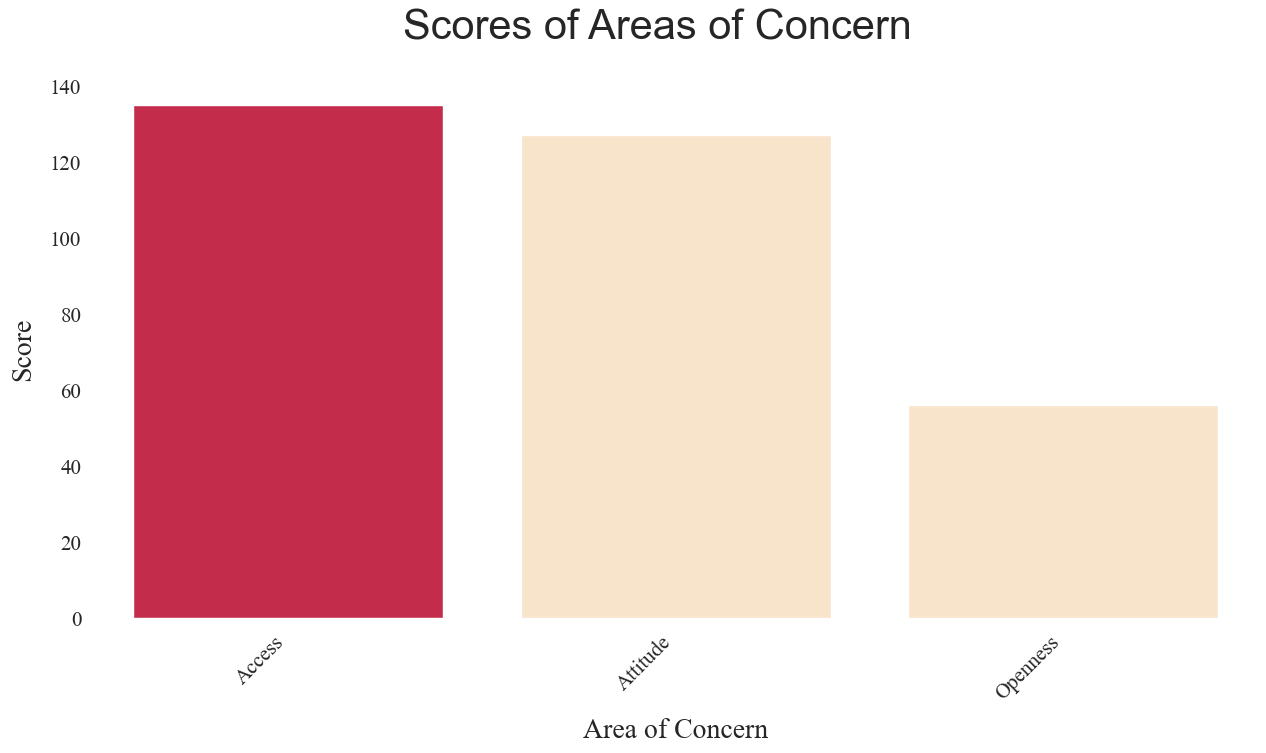

In [536]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

scores = pd.DataFrame({'Area':['Access', 'Attitude', 'Openness'], 'Value':[Access_Score, Attitude_Score, Openness_Score]})

chart = sns.barplot(
    ax=axes,
    x="Area",
    y="Value",
    data=scores,
    errorbar=None,
    palette=[ord_color if x != "Access" else spec_lev1
        for x in scores["Area"]],
)


plt.xlabel("Area of Concern")
plt.ylabel("Score")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Scores of Areas of Concern")

plt.show()

### Section Summary
> * By far, the majority of participants reported that they are not comfortable discussing mental health issues in the workplace, even though many more reported that there is a positive attitude toward discussing mental health issues and good access to resources on mental health in the workplace.

# Conclusions
> **Number of Participants in This Analysis:** I analyzed the responses of the remaining 909 participants. These are workers whose jobs are tech/IT related and who worked primarily for a tech company or organization. <br>
> **Mental Illness Among Tech Workers:** This analysis showed that between 41 and 46 percent of participants reported either a current, past or family history of mental illness. 240 of the 909 participants reported current, past and family history of mental illness. Are these numbers close to numbers in the general population? Further studies would be needed for better understanding. <br>
> **Openness to Discuss Mental Health Issues:** This analysis illustrated that in general, participants feel that they have a better access to mental health resources and experience a better attitude toward mental health in the workplace than their willingnees to discuss mental health issues. More studies are needed to determine the reason for these discrepencies.  

# Suggestions for Improvement

> **Countries of Residence:** The majority (624 of 909) of participants for this analysis lived in the United States. The culture of the United States may be different enough than other countries to make any conclusions about participants from other countries inconclusive. Better sampling to represent other countries would improve this analysis. <br>
> **Gender:** As I may have expected, the majority of participants in this analysis identified themselves as male. Males may view and handle situations differently than females. Furthermore, males and females may be treated differently in the workplace. This fact should also be kept in mind when forming conclusions from this analysis. Including more females could make this analysis more balanced.<br>
> **Age:** I was not surprised to find that the largest groups were those in their 30s. In my experience, people at different stages of their lives handle situations differently. The fact that most respondents were in their 30s should be kept in mind when forming conclusions from this analysis. It may be difficult to include other age groups if majority of tech workers are in their 30s, but all efforts should be made to make this possible. <br>
> **Pandas:** Continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
> **Seaborn and Matplotlib:** Similar to Pandas, continue to improve on my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
> **Python Code:** Continue to write better and more efficient Python code. <br>
> **Clean Code:** Continue to adhere to the principles of writing clean code. <br>
> **Readability and Efficiency:** Improve on finding this delicate balance between readability and efficiency in coding.<br>

# Appendix

## Responses to Three Narrative Questions

### QuestionID 59: 
Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.

"I needed to discuss accommodations due to Autism and ADHD. The conversation was with my boss and the inclusion officer. Conversation went well. Agreed accommodations where never actually implemented."

"On my second day of work, I had a breakdown and was unable to enter the building. My employer met me outside and listened to my problems. Following our conversation he offered to let me work from home, which I did until a few weeks later when I was comfortable to come into the office"

"I was blocking out some periods of time during work days as "busy" on my calendar. Sometimes, I would disappear for an hour and a half and show back up later. I always worked nights and weekends to make up for the missed time but the time in office was important to my manager.\n\nHe asked me what was going on and I told him I am in outpatient rehab. He was very accepting of it. He let me know he had gone through rehab himself and that I could trust him to make things comfortable."

### QuestionID 61
Describe the conversation with coworkers you had about your mental health including their reactions.

"I've talked about my depression with coworkers in the past. They were good listeners and very supportive."

"To a select few co-workers I did talk about mental health diagnosis. Basically there reaction was I don't care."

"I've had multiple conversations with groups of coworkers that include people dealing with anxiety and depression themselves. Anyone I worked with directly and talked about this has been very supportive and empathetic"

### QuestionID 82
Describe the circumstances of the badly handled or unsupportive response.

"After disclosing my mental illness to an employer, the immediate response was for them to yell "I don't want to hear any excuses!" and dismiss the idea of any accommodations outright. They let me go shortly thereafter."

"New employee with mental health issues that needed a support animal was let go because he no longer had the 14-year old note from his doctor for his service dog (dog was 14 years old) and his doctor was three states away."

"I watched someone with a panic attack become ostracized by co-workers until they quit.	"